In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

Ref: https://github.com/xieliang555/homework/tree/master/hw2

In [2]:
"""
Using the plotter:
Call it from the command line, and supply it with logdirs to experiments.
Suppose you ran an experiment with name 'test', and you ran 'test' for 10 
random seeds. The runner code stored it in the directory structure
    data
    L test_EnvName_DateTime
      L  0
        L log.txt
        L params.json
      L  1
        L log.txt
        L params.json
       .
       .
       .
      L  9
        L log.txt
        L params.json
To plot learning curves from the experiment, averaged over all random
seeds, call
    python plot.py data/test_EnvName_DateTime --value AverageReturn
and voila. To see a different statistics, change what you put in for
the keyword --value. You can also enter /multiple/ values, and it will 
make all of them in order.
Suppose you ran two experiments: 'test1' and 'test2'. In 'test2' you tried
a different set of hyperparameters from 'test1', and now you would like 
to compare them -- see their learning curves side-by-side. Just call
    python plot.py data/test1 data/test2
and it will plot them both! They will be given titles in the legend according
to their exp_name parameters. If you want to use custom legend titles, use
the --legend flag and then provide a title for each logdir.
"""

def plot_data(data, value="AverageReturn"):
    if isinstance(data, list):
        data = pd.concat(data, ignore_index=True)

    plt.figure()
    sns.set(style="darkgrid", font_scale=1.5)
    sns.tsplot(data=data, time="Iteration", value=value, unit="Unit", condition="Condition")
    plt.legend(loc='best').set_draggable(True)
    plt.show()


def get_datasets(fpath, condition=None):
    unit = 0
    datasets = []
    for root, dir, files in os.walk(fpath):
        if 'log.txt' in files:
            param_path = open(os.path.join(root,'params.json'))
            params = json.load(param_path)
            exp_name = params['exp_name']
            
            log_path = os.path.join(root,'log.txt')
            experiment_data = pd.read_table(log_path)

            experiment_data.insert(
                len(experiment_data.columns),
                'Unit',
                unit
                )        
            experiment_data.insert(
                len(experiment_data.columns),
                'Condition',
                condition or exp_name
                )

            datasets.append(experiment_data)
            unit += 1

    return datasets

/home/xieliang/anaconda3/envs/speech/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


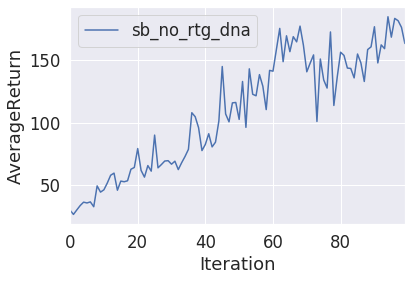

In [3]:
data = get_datasets("/home/xieliang/NFS/plot/2020-06-23")
plot_data(data)